In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from random import choice

In [ ]:
class shop:
    def __init__(self, mu, dev):
        self.mu = mu
        self.dev = dev
    def sample(self):
        return np.random.normal(self.mu, self.dev)

In [ ]:
def epsilon_greedy(candidates, num_time, epsilon=0.05):
    scores = []
    history = {idx: [c.sample()] for idx,c in enumerate(candidates)}
    for _ in range(num_time - len(candidates)):
        p = np.random.random()
        #explore
        if p < epsilon:
            chosen = choice(candidates)
        #exploit
        else:
            chosen = candidates[sorted(history.items(), key=lambda pair: np.mean(pair[1]))[-1][0]]
        score = chosen.sample()
        scores.append(score)
        history[candidates.index(chosen)].append(score)
    return sum(scores)

In [ ]:
def ucb1(candidates, num_time):
    scores = []
    history = {idx: [c.sample()] for idx,c in enumerate(candidates)}
    for t in range(len(candidates), num_time):
        mu_plus_ucb = [np.mean(history[idx]) + np.sqrt(2*np.log(t) / len(history[idx])) for idx in range(len(candidates))]
        chosen = candidates[np.argmax(mu_plus_ucb)]
        
        score = chosen.sample()
        scores.append(score)
        history[candidates.index(chosen)].append(score)
    return sum(scores)

In [ ]:
dev_factor = 0.5
num_items = 10

mu_vals = [0.5,0.86,0.25,0.63,0.96,0.75,0.82,0.56,0.19,0.28]
dev_vals = [mu*dev_factor for mu in mu_vals]
mu_dev_pairs = zip(mu_vals, dev_vals)

candidates = [shop(mu,dev) for mu,dev in mu_dev_pairs]

num_time = 100

optimal_average = max(mu_vals)*num_time

Epsilon Greedy Mean Regret (10%): 0.2011790745086429


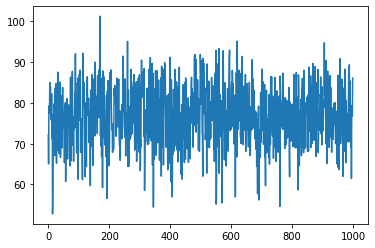

In [ ]:
epsilon_greedy_vals = []
for _ in range(1000):
    val = epsilon_greedy(candidates, num_time, 0.1)
    epsilon_greedy_vals.append(val)
plt.plot(epsilon_greedy_vals)
print('Epsilon Greedy Mean Regret (10%%): %s'%((optimal_average - np.mean(epsilon_greedy_vals)) / optimal_average))

In [ ]:
ucb1_vals = []
for _ in range(1000):
    val = ucb1(candidates, num_time)
    ucb1_vals.append(val)
print('UCB1 Mean Regret: %s'%((optimal_average - np.mean(ucb1_vals)) / optimal_average))

UCB1 Mean Regret: 0.33637438418148413


In [ ]:
import statsmodels.api as sm
x = mu_vals
y = dev_vals
x2 = sm.add_constant(x)
modl = sm.OLS(y,x2)
modl2 = modl.fit()
print(modl2.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.346e+31
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          3.14e-124
Time:                        06:36:33   Log-Likelihood:                 360.11
No. Observations:                  10   AIC:                            -716.2
Df Residuals:                       8   BIC:                            -715.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.551e-17   4.82e-17      1.152      0.2

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
